<a href="https://colab.research.google.com/github/RDBSANTOS/Aviation-Acidents-Analysis/blob/main/Analysis_Aviation_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
#Loading the libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#Analysis of the Civil Aviation Accidents

# Loading the data:

In [ ]:
#Importing the data:
base_acidentes_aviao = pd.read_csv('/content/drive/MyDrive/KEGGLE/Cópia de aviation-accident.csv')
base_acidentes_aviao



,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23912,16-FEB-2023,Cessna 208 Cargomaster,CX-MAX,AeromÃ¡s,0,"near Berisso, BA",Argentina,A1,2023
23913,17-FEB-2023,Honda HA-420 HondaJet,N14QB,Haedo Air LLC,0,Houston-William ...,USA,A2,2023
23914,22-FEB-2023,Beech B200 Super King Air,N55PC,CTEH,5,near Little Rock-Bill...,USA,A1,2023
23915,28-FEB-2023,Cessna 208B Grand Caravan,C-GMVB,ZAM Air Service,2,"near Nakina, ON",Canada,A1,2023


In [ ]:

# Breaf description of the dataset:
base_acidentes_aviao.describe()

,date,type,registration,operator,fatalities,location,country,cat,year
count,23917,23917,22365,23913,19935,22959,23917,23917,23917
unique,15056,3193,21909,5996,369,14584,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1915,13,2603,10627,273,4371,17396,1505


#Correcting the column year:

In [ ]:
base_acidentes_aviao.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
#Verifying values 'UNKNOW':
base_acidentes_aviao[base_acidentes_aviao['year']=='unknown']
base_acidentes_aviao.head(10)

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,unknown
6,date unk.,Antonov An-2,CCCP-N574,"GUSMP, Directorate of Polar Aviation",NaN,unknown,Russia,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0,NaN,Russia,A1,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown


In [ ]:
#Generating a dataframe without values 'UNKNOWN':
base_acidentes_ano = base_acidentes_aviao[base_acidentes_aviao['year']!='unknown']
base_acidentes_ano.head()

,date,type,registration,operator,fatalities,location,country,cat,year
61,02-AUG-1919,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,A1,1919
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920


In [ ]:
#Dropping NA values:
base_acidentes_ano['year'] = base_acidentes_ano['year'].dropna()
base_acidentes_ano.head(10)

<ipython-input-112-7afcecb59336>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_acidentes_ano['year'] = base_acidentes_ano['year'].dropna()


,date,type,registration,operator,fatalities,location,country,cat,year
61,02-AUG-1919,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,A1,1919
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
67,15-JAN-1921,Aeromarine 75,NaN,Aeromarine Airways,0,Havana harbour,Cuba,O1,1921
68,02-MAR-1921,Handley Page O/7,G-IAAC,HP Indo-Burmese Transport,0,Meerut,India,O1,1921
69,04-MAR-1921,Caproni Ca.60 Noviplano,NaN,Caproni,0,Lago Maggiore,Italy,A1,1921
70,26-AUG-1921,Farman F.60 Goliath,O-BLAN,SNETA,2,near Calais [The Engl...,France,A1,1921


In [ ]:
base_acidentes_ano.shape

(23856, 9)

In [ ]:
#checking if all NA values were removed:
base_acidentes_ano['year'].isna().sum()

0

In [ ]:
#checking if all 'unknown' values were removed:
base_acidentes_ano['year'].loc[base_acidentes_ano['year']=='unknown'].sum()

0

#1 - Calculating the annual total of accidents:

In [ ]:
#acidentes_ano_agregado= base_acidentes_ano.groupby('year', as_index =False).sum()
acidentes= pd.DataFrame(base_acidentes_ano['year'])
acidentes



,year
61,1919
62,1919
63,1920
64,1920
65,1920
...,...
23912,2023
23913,2023
23914,2023
23915,2023


In [ ]:
#Accidents per year:
acidentes_anuais = acidentes.groupby(['year']).size().reset_index(name='Numero_acidentes')
acidentes_anuais.head(20)


,year,Numero_acidentes
0,1919,2
1,1920,4
2,1921,7
3,1922,3
4,1923,8
5,1924,3
6,1925,2
7,1926,4
8,1927,2
9,1928,14


In [ ]:
#Finding the year with the greater number of accidents:
ano_mais_acidentes = acidentes_anuais.loc[acidentes_anuais['Numero_acidentes'].idxmax(),'year']
quantidade_acidentes = acidentes_anuais.loc[acidentes_anuais['Numero_acidentes'].idxmax(),'Numero_acidentes']

print('The year with the greater number of accidents from 1919 to 2023 is {} with {} accidents.' .format(ano_mais_acidentes,quantidade_acidentes))

The year with the greater number of accidents from 1919 to 2023 is 1944 with 1505 accidents.


In [ ]:
#Printing the line of 1944:
ano_mais_acidentes= acidentes_anuais.loc[acidentes_anuais['Numero_acidentes'].idxmax()]
print(ano_mais_acidentes)


year                1944
Numero_acidentes    1505
Name: 25, dtype: object


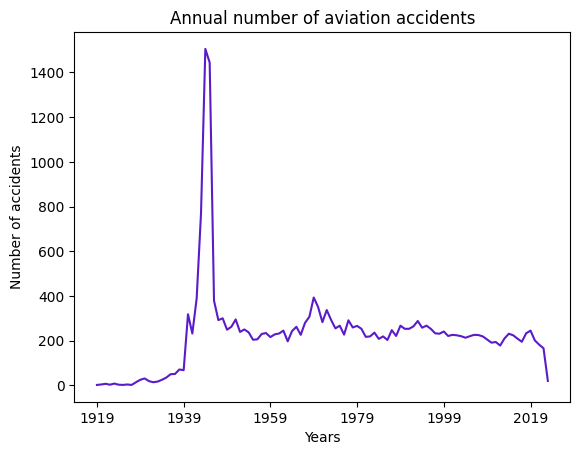

In [ ]:


acidentes_anuais.plot('year','Numero_acidentes', color ='#5B1BC9', title = 'Annual number of aviation accidents', xlabel = 'Years', ylabel = 'Number of accidents' )
plt.legend().remove()
plt.savefig('annual_accidents.png')





# 2 - Calculating the ten years with the highest number of accidents between 1919 - 2023:

In [ ]:
dez_maiores =  acidentes_anuais.nlargest(10,'Numero_acidentes')
dez_maiores

,year,Numero_acidentes
25,1944,1505
26,1945,1444
24,1943,769
50,1969,393
23,1942,389
27,1946,379
51,1970,351
53,1972,337
21,1940,318
49,1968,307


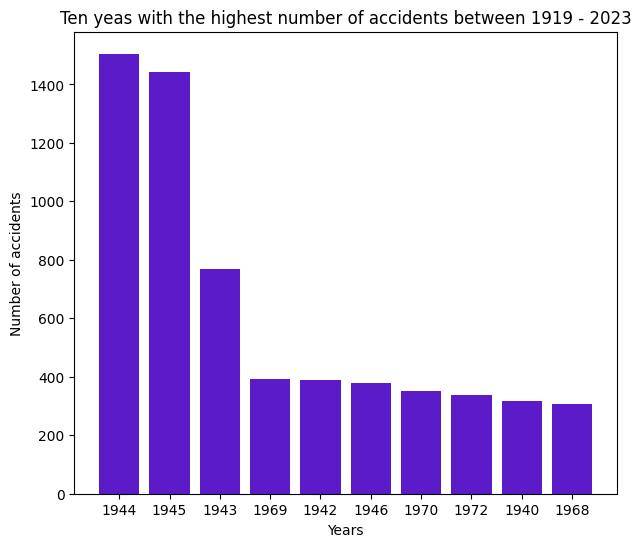

In [ ]:
#Generating the bar chart :
from matplotlib.pyplot import xlabel, ylabel
x =  dez_maiores['year']
y = dez_maiores['Numero_acidentes']

plt.figure(figsize=(7,6))
plt.bar(x,y,color ='#5B1BC9')

plt.title('Ten yeas with the highest number of accidents between 1919 - 2023')
plt.xlabel('Years')
plt.ylabel('Number of accidents')
plt.savefig('top_10y_accidents.png')


plt.show()


#3 - The year with the highest number of accidents:

In [ ]:
ano_mais_acidentes= acidentes_anuais.loc[acidentes_anuais['Numero_acidentes'].idxmax()]
print(ano_mais_acidentes)

year                1944
Numero_acidentes    1505
Name: 25, dtype: object


#4 - Calculating the number of accidents per decade:

In [ ]:
# Loop to get the values per decade:
a=0
years_1 = []
for x in acidentes_anuais['Numero_acidentes'][0:11]:
  
  a+=x
print(' O número de acidentes de avião na década de 1919-1930 é {}.' .format(a))
for y in acidentes_anuais['year'][0:11]:
  years_1.append(y)
print(years_1)
print("-------------")
print(end='\n')

#______________________________
b = 0
years_2 = []
for x in acidentes_anuais['Numero_acidentes'][11:21]:
  b+=x
print(' O número de acidentes de avião na década de 1930-1940 é {}.' .format(b))

for y in acidentes_anuais['year'][11:21]:
  years_2.append(y)

print(years_2)
print("-------------")
print(end = '\n')

#_______________________________
c = 0
years_3 = []
for x in acidentes_anuais['Numero_acidentes'][21:31]:
  c+=x
print(' O número de acidentes de avião na década de 1940-1950 é {}.' .format(c))

for y in acidentes_anuais['year'][21:31]:
  years_3.append(y)

print(years_3)
print("-------------")
print(end=('\n'))

#_______________________________
d = 0 
years_4 = []
for x in acidentes_anuais['Numero_acidentes'][31:41]:
  d+=x
print(' O número de acidentes de avião na década de 1950-1960 é {}.' .format(d))
for y in acidentes_anuais['year'][31:41]:
  years_4.append(y)
print(years_4)
print("-------------")
print(end=('\n'))

#_______________________________
e = 0
years_5 = []
for x in acidentes_anuais['Numero_acidentes'][41:51]:
  e+=x
print(' O número de acidentes de avião na década de 1960-1970 é {}.' .format(e))

for y in acidentes_anuais['year'][41:51]:
  years_5.append(y)
print(years_5)

print("-------------")
print(end=('\n'))

#_______________________________
f = 0
years_6 = []
for x in acidentes_anuais['Numero_acidentes'][51:61]:
  f+=x
print(' O número de acidentes de avião na década de 1970-1980 é {}.' .format(f))

for y in acidentes_anuais['year'][51:61]:
  years_6.append(y)
print(years_6)

print("-------------")
print(end=('\n'))

#_______________________________
g = 0
years_7 = []
for x in acidentes_anuais['Numero_acidentes'][61:71]:
  g+=x
print(' O número de acidentes de avião na década de 1980-1990 é {}' .format(g))

for y in acidentes_anuais['year'][61:71]:
  years_7.append(y)
print(years_7)
print("-------------")
print(end=('\n'))

#_______________________________
h = 0
years_8 = []
for x in acidentes_anuais['Numero_acidentes'][71:81]:
  h+=x
print(' O número de acidentes de avião na década de 1990-2000 é {}' .format(h))

for y in acidentes_anuais['year'][71:81]:
  years_8.append(y)
print(years_8)
print("-------------")
print(end=('\n'))

#_______________________________
i = 0
years_9 = []
for x in acidentes_anuais['Numero_acidentes'][81:91]:
  i+=x
print(' O número de acidentes de avião na década de 2000-2010 é {}' .format(i))

for y in acidentes_anuais['year'][81:91]:
  years_9.append(y)
print(years_9)
print("-------------")
print(end=('\n'))

j = 0
years_10 = []
for x in acidentes_anuais['Numero_acidentes'][91:]:
  j+=x
print(' O número de acidentes de avião na década de 2010-2023 é {} ' .format(j))

for y in acidentes_anuais['year'][91:]:
  years_10.append(y)
print(years_10)
print("-------------")
print(end=('\n'))



 O número de acidentes de avião na década de 1919-1930 é 74.
['1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929']
-------------

 O número de acidentes de avião na década de 1930-1940 é 381.
['1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939']
-------------

 O número de acidentes de avião na década de 1940-1950 é 5877.
['1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949']
-------------

 O número de acidentes de avião na década de 1950-1960 é 2373.
['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959']
-------------

 O número de acidentes de avião na década de 1960-1970 é 2613.
['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969']
-------------

 O número de acidentes de avião na década de 1970-1980 é 2829.
['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979']
-------------

 O número de acidentes de avião na década

In [ ]:
#Creating a new dataframe with the vaslues per decade:
dados_decada = {'1919-1930':a, '1931-1940':b, '1941-1950':c, '1951-1960':d, '1961-1970':e, '1971-1980':f,'1981-1990':g,'1991-2000':h,'2001-2010':i, '2011-2023':j}
df_dados_decada = pd.DataFrame.from_dict(dados_decada,orient = 'index', columns = ['Numero_acidentes']).reset_index()
df_dados_decada = df_dados_decada.rename(columns={'index': 'Décadas'})
df_dados_decada

,Décadas,Numero_acidentes
0,1919-1930,74
1,1931-1940,381
2,1941-1950,5877
3,1951-1960,2373
4,1961-1970,2613
5,1971-1980,2829
6,1981-1990,2290
7,1991-2000,2541
8,2001-2010,2199
9,2011-2023,2679


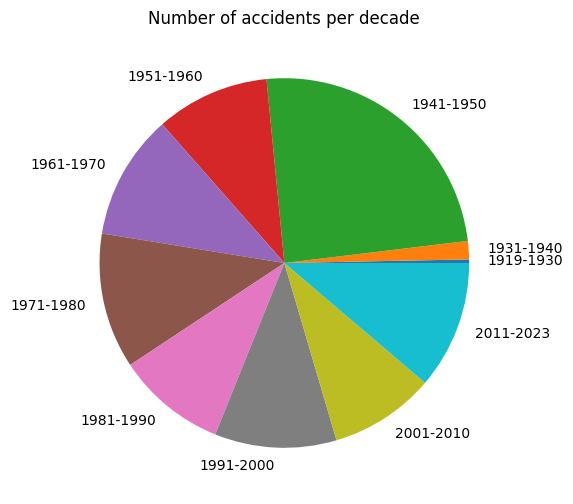

In [ ]:
# Creating a plot showing the accidents per decade:
x =  df_dados_decada['Décadas']
y = df_dados_decada['Numero_acidentes']
plt.figure(figsize = (7,6))
plt.title("Number of accidents per decade")
plt.pie(y, labels=x)
plt.savefig('acidentes_decadas.png')
plt.show()



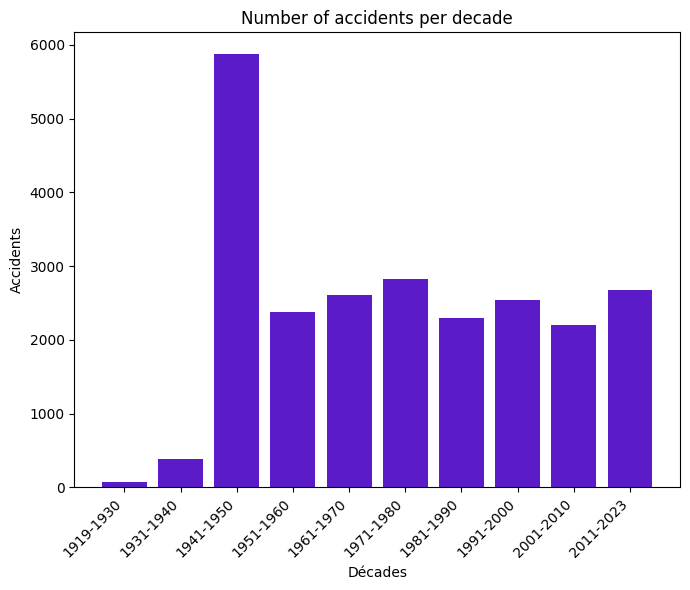

In [ ]:
# Creating a bar plot showing the accidents per decade:
x =  df_dados_decada['Décadas']
y = df_dados_decada['Numero_acidentes']
plt.figure(figsize = (7,6))
plt.title("Number of accidents per decade")
plt.bar(x,y,color = '#5B1BC9',)
plt.xlabel('Décades')
plt.ylabel('Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('aci_decadas_bar.png')
plt.show()


#5 - The decade with the highest number of accidents:

In [ ]:
decada_mais_acidentes = df_dados_decada.loc[df_dados_decada['Numero_acidentes'].idxmax()]
print(decada_mais_acidentes )

Décadas             1941-1950
Numero_acidentes         5877
Name: 2, dtype: object


# Preparing the data to analyse accidents with fatalities:

Preparing the column 'fatalities':

In [ ]:
print(base_acidentes_ano.isna().sum())

date               0
type               0
registration    1549
operator           4
fatalities      3946
location         930
country            0
cat                0
year               0
dtype: int64


In [ ]:
acidentes_ano_novo = base_acidentes_ano.copy()

acidentes_ano_novo = acidentes_ano_novo.dropna(subset=['fatalities'])
acidentes_ano_novo


,date,type,registration,operator,fatalities,location,country,cat,year
61,02-AUG-1919,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,A1,1919
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
...,...,...,...,...,...,...,...,...,...
23912,16-FEB-2023,Cessna 208 Cargomaster,CX-MAX,AeromÃ¡s,0,"near Berisso, BA",Argentina,A1,2023
23913,17-FEB-2023,Honda HA-420 HondaJet,N14QB,Haedo Air LLC,0,Houston-William ...,USA,A2,2023
23914,22-FEB-2023,Beech B200 Super King Air,N55PC,CTEH,5,near Little Rock-Bill...,USA,A1,2023
23915,28-FEB-2023,Cessna 208B Grand Caravan,C-GMVB,ZAM Air Service,2,"near Nakina, ON",Canada,A1,2023


In [ ]:
acidentes_ano_novo.shape

(19910, 9)

CONVERTENDO POSSÍVEIS STRINGS PRESENTES NA COLUNA EM DADOS NUMÉRICOS

In [ ]:
#CONVERTENDO POSSÍVEIS STRINGS PRESENTES NA CPLUNA EM DADOS NUMÉRICOS

acidentes_ano_novo['fatalities'] = pd.to_numeric(acidentes_ano_novo['fatalities'],downcast='integer', errors = 'coerce')
type(acidentes_ano_novo), acidentes_ano_novo.shape

(pandas.core.frame.DataFrame, (19910, 9))

In [ ]:
#numero de acidentes nao fatais

acidentes_nao_fatais = acidentes_ano_novo.loc[acidentes_ano_novo['fatalities']==0].count()
print(acidentes_nao_fatais)



date            10602
type            10602
registration     9760
operator        10599
fatalities      10602
location        10497
country         10602
cat             10602
year            10602
dtype: int64


In [ ]:
tmnf = 19558 - 10602 
fmnfatais= 10602 +8956
print(tmnf,fmnfatais)
#tmnf = todos menos nao fatais
#fmnfatais = Nao fatais mais os fatais



8956 19558


In [ ]:
#Há valores negativos na coluna fatalities???

negativos = acidentes_ano_novo.loc[acidentes_ano_novo['fatalities'] < 0].values
negativos


array([], shape=(0, 9), dtype=object)

In [ ]:
#RETORNANDO APENAS OS ACIDENTES COM VÍTIMAS FATAIS:
base_acidentes_fatais = acidentes_ano_novo.copy()

acidentes_fatais = base_acidentes_fatais.loc[base_acidentes_fatais['fatalities']>0]
type(acidentes_fatais), acidentes_fatais.shape

(pandas.core.frame.DataFrame, (8956, 9))

In [ ]:
#SE CERTIFICANDO DE QUE NAO HÁ VALORES NA.
acidentes_fatais['fatalities'].dropna(inplace=True)
acidentes_fatais.shape


<ipython-input-34-13556ee75f6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_fatais['fatalities'].dropna(inplace=True)


(8956, 9)

In [ ]:
acidentes_fatais['fatalities'].isna().any()

False

In [ ]:
acidentes_fatais

,date,type,registration,operator,fatalities,location,country,cat,year
61,02-AUG-1919,Caproni Ca.48,NaN,Caproni,14.0,Verona,Italy,A1,1919
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1.0,near Felixtowe RNAS,U.K.,A1,1919
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4.0,Golders Green,U.K.,A1,1920
70,26-AUG-1921,Farman F.60 Goliath,O-BLAN,SNETA,2.0,near Calais [The Engl...,France,A1,1921
75,31-MAR-1922,Handley Page O/7,NaN,Chinese Government,14.0,near Beijing-Nanyuan ...,China,A1,1922
...,...,...,...,...,...,...,...,...,...
23898,09-JAN-2023,Antonov An-2R,RA-71165,Naryan-Mar Air Enterprise,2.0,near Karatayka,Russia,A1,2023
23900,15-JAN-2023,ATR 72-500 (72-212A),9N-ANC,Yeti Airlines,72.0,near Pokhara Internat...,Nepal,A1,2023
23907,02-FEB-2023,Cessna 208B Grand Caravan,5Y-BMZ,Unknown,1.0,Nasir Airport,South Sudan,A1,2023
23914,22-FEB-2023,Beech B200 Super King Air,N55PC,CTEH,5.0,near Little Rock-Bill...,USA,A1,2023


In [ ]:
print(acidentes_fatais.columns)

Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year'],
      dtype='object')


In [ ]:
#Convertendo pra numeros
#base_acidentes_ano['fatalities'] = pd.to_numeric(base_acidentes_ano['fatalities'], errors = 'coerce')
#type(base_acidentes_ano), base_acidentes_ano.shape

#6 - Calculating the number o accidents with fatalities per year:

In [ ]:
acidentes_fatais_final = acidentes_fatais.groupby('year')['fatalities'].sum().reset_index()
pd.DataFrame(acidentes_fatais_final)



,year,fatalities
0,1919,15.0
1,1920,4.0
2,1921,2.0
3,1922,19.0
4,1923,11.0
...,...,...
99,2019,421.0
100,2020,332.0
101,2021,277.0
102,2022,283.0


<Figure size 700x600 with 0 Axes>

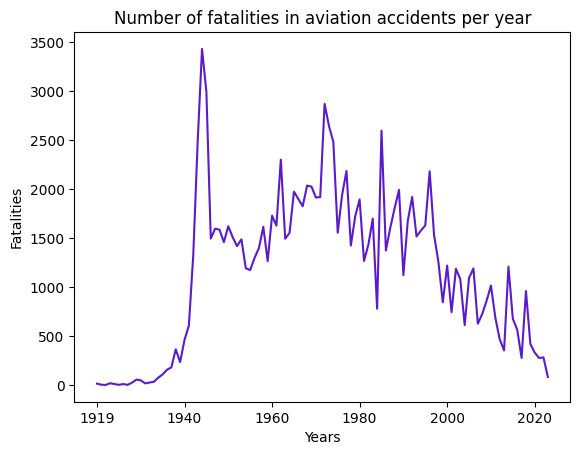

In [ ]:
#Ploting a line showing the number of fatalitie per year:
plt.figure(figsize = (7, 6))
acidentes_fatais_final.plot('year', 'fatalities', color = '#5B1BC9', 
                            title = 'Number of fatalities in aviation accidents per year', xlabel = 'Years', ylabel = 'Fatalities')
plt.legend().remove()
plt.savefig('fatalities_year.png')
plt.show()
#acidentes_anuais.plot('year','Numero_acidentes', color ='#5B1BC9', title = 'Annual number of aviation accidents', xlabel = 'Years', ylabel = 'Number of accidents' )

#7 - What was the year that had the greater number of  fatalities?

In [ ]:
maior_ano_fatalidades = acidentes_fatais_final.loc[acidentes_fatais_final['fatalities'].idxmax()]
print(maior_ano_fatalidades)

year            1944
fatalities    3434.0
Name: 24, dtype: object


#8 - The ten years with the highest number of accidents?

In [ ]:
dez_fatalities = acidentes_fatais_final.nlargest(10,'fatalities')
print(dez_fatalities)

    year  fatalities
24  1944      3434.0
25  1945      2996.0
52  1972      2872.0
53  1973      2648.0
65  1985      2599.0
54  1974      2483.0
23  1943      2476.0
42  1962      2303.0
57  1977      2187.0
76  1996      2184.0


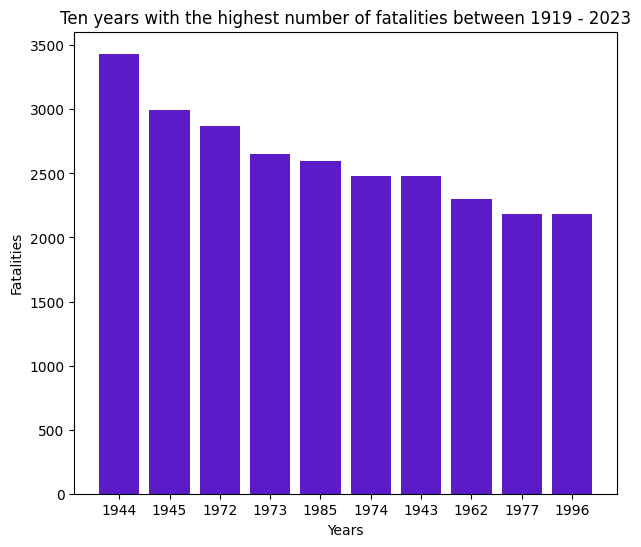

In [ ]:
x =  dez_fatalities['year']
y = dez_fatalities['fatalities']

plt.figure(figsize=(7,6))
plt.bar(x,y,color ='#5B1BC9')

plt.title('Ten years with the highest number of fatalities between 1919 - 2023')
plt.xlabel('Years')
plt.ylabel('Fatalities')
plt.savefig('top_10y_fatalities.png')


plt.show()

#9 - What was the number of accidents with fatalities per decade?

In [ ]:
a=0
years_1 = []
for x in acidentes_fatais_final['fatalities'][0:11]:
  
  a+=x
print(' O número de pessoas mortas em acidentes de avião na década de 1919-1930 é de {} pessoas.' .format(a))
for y in acidentes_fatais_final['year'][0:11]:
  years_1.append(y)
print(years_1)
print("-------------")
print(end='\n')

#______________________________
b = 0
years_2 = []
for x in acidentes_fatais_final['fatalities'][11:21]:
  b+=x
print(' O número de pessoas mortas em acidentes de avião na década de 1930-1940 é de {} pessoas.' .format(b))

for y in acidentes_fatais_final['year'][11:21]:
  years_2.append(y)

print(years_2)
print("-------------")
print(end = '\n')

#_______________________________
c = 0
years_3 = []
for x in acidentes_fatais_final['fatalities'][21:31]:
  c+=x
print(' O número de pessoas mortas em acidentes de avião na década de 1940-1950 é de {} pessoas.' .format(c))

for y in acidentes_fatais_final['year'][21:31]:
  years_3.append(y)

print(years_3)
print("-------------")
print(end=('\n'))

#_______________________________
d = 0 
years_4 = []
for x in acidentes_fatais_final['fatalities'][31:41]:
  d+=x
print(' O número de pessoas mortas em acidentes de avião na década de 1950-1960 é de {} pessoas.' .format(d))
for y in acidentes_fatais_final['year'][31:41]:
  years_4.append(y)
print(years_4)
print("-------------")
print(end=('\n'))

#_______________________________
e = 0
years_5 = []
for x in acidentes_fatais_final['fatalities'][41:51]:
  e+=x
print(' O número de pessoas mortas em acidentes de avião na década de 1960-1970 é de {} pessoas.' .format(e))

for y in acidentes_fatais_final['year'][41:51]:
  years_5.append(y)
print(years_5)

print("-------------")
print(end=('\n'))

#_______________________________
f = 0
years_6 = []
for x in acidentes_fatais_final['fatalities'][51:61]:
  f+=x
print(' O número de pessoas mortas em acidentes de avião na década de 1970-1980 é de {} pessoas.' .format(f))

for y in acidentes_fatais_final['year'][51:61]:
  years_6.append(y)
print(years_6)

print("-------------")
print(end=('\n'))

#_______________________________
g = 0
years_7 = []
for x in acidentes_fatais_final['fatalities'][61:71]:
  g+=x
print(' O número de pessoas mortas em acidentes de avião na década de 1980-1990 é de {} pessoas' .format(g))

for y in acidentes_fatais_final['year'][61:71]:
  years_7.append(y)
print(years_7)
print("-------------")
print(end=('\n'))

#_______________________________
h = 0
years_8 = []
for x in acidentes_fatais_final['fatalities'][71:81]:
  h+=x
print(' O número de pessoas mortas em acidentes de avião na década de 1990-2000 é de {} pessoas' .format(h))

for y in acidentes_fatais_final['year'][71:81]:
  years_8.append(y)
print(years_8)
print("-------------")
print(end=('\n'))

#_______________________________
i = 0
years_9 = []
for x in acidentes_fatais_final['fatalities'][81:91]:
  i+=x
print(' O número de pessoas mortas em acidentes de avião na década de 2000-2010 é de {} pessoas' .format(i))

for y in acidentes_fatais_final['year'][81:91]:
  years_9.append(y)
print(years_9)
print("-------------")
print(end=('\n'))

j = 0
years_10 = []
for x in acidentes_fatais_final['fatalities'][91:]:
  j+=x
print(' O número de pessoas mortas em acidentes de avião na década de 2010-2023 é de {} pessoas' .format(j))

for y in acidentes_fatais_final['year'][91:]:
  years_10.append(y)
print(years_10)
print("-------------")
print(end=('\n'))



 O número de pessoas mortas em acidentes de avião na década de 1919-1930 é de 198.0 pessoas.
['1919', '1920', '1921', '1922', '1923', '1925', '1926', '1927', '1928', '1929', '1930']
-------------

 O número de pessoas mortas em acidentes de avião na década de 1930-1940 é de 1664.0 pessoas.
['1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940']
-------------

 O número de pessoas mortas em acidentes de avião na década de 1940-1950 é de 18608.0 pessoas.
['1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950']
-------------

 O número de pessoas mortas em acidentes de avião na década de 1950-1960 é de 14103.0 pessoas.
['1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960']
-------------

 O número de pessoas mortas em acidentes de avião na década de 1960-1970 é de 18670.0 pessoas.
['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970']
-------------

 O número de pessoas mortas em acidentes

In [ ]:
dados = {'1919-1930':a, '1931-1940':b, '1941-1950':c, '1951-1960':d, '1961-1970':e, '1971-1980':f,'1981-1990':g,'1991-2000':h,'2001-2010':i, '2011-2023':j}
dados

{'1919-1930': 198.0,
 '1931-1940': 1664.0,
 '1941-1950': 18608.0,
 '1951-1960': 14103.0,
 '1961-1970': 18670.0,
 '1971-1980': 20658.0,
 '1981-1990': 15688.0,
 '1991-2000': 15372.0,
 '2001-2010': 9146.0,
 '2011-2023': 6602.0}

In [ ]:
df_mortes_decadas = pd.DataFrame.from_dict(dados, orient ='index', columns=['morte'])
#deifinir uma coluna ídice e renomear a coluna "índice" como "décadas".
df_mortes_decadas=df_mortes_decadas.reset_index()
df_mortes_decadas = df_mortes_decadas.rename(columns = {'index':'decadas'})
df_mortes_decadas


,decadas,morte
0,1919-1930,198.0
1,1931-1940,1664.0
2,1941-1950,18608.0
3,1951-1960,14103.0
4,1961-1970,18670.0
5,1971-1980,20658.0
6,1981-1990,15688.0
7,1991-2000,15372.0
8,2001-2010,9146.0
9,2011-2023,6602.0


<function matplotlib.pyplot.show(close=None, block=None)>

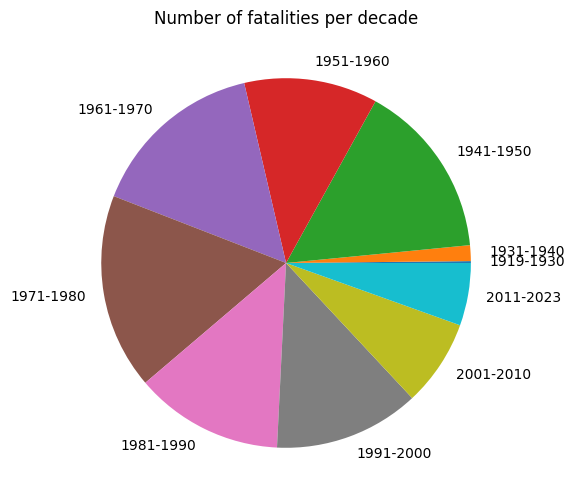

In [ ]:
#Cresting a pie chart:
x = df_mortes_decadas['decadas']
y = df_mortes_decadas['morte']
plt.figure(figsize = (7,6))
plt.pie(y, labels = x)
plt.title('Number of fatalities per decade')



plt.savefig('fatalities_decades_pie.png')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

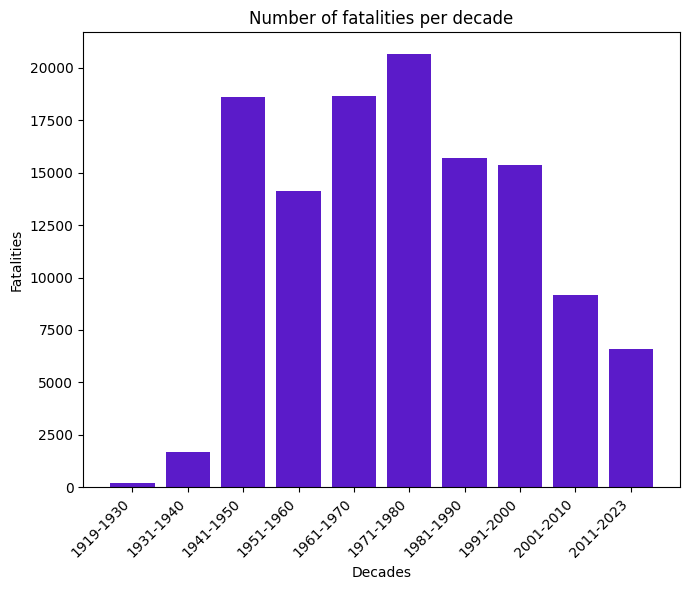

In [ ]:
#Cresting a bar chart:
x = df_mortes_decadas['decadas']
y = df_mortes_decadas['morte']
plt.figure(figsize = (7,6))
plt.bar(x,y, color = '#5B1BC9')
plt.title('Number of fatalities per decade')
plt.xlabel('Decades')
plt.ylabel('Fatalities')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig('fatalities_decades.png')
plt.show


# 10 - what was the decade that had the highest number of fatalities?

In [ ]:
ano_max_mortes = df_mortes_decadas.loc[df_mortes_decadas['morte'].idxmax()]
print(ano_max_mortes)

decadas    1971-1980
morte        20658.0
Name: 5, dtype: object


In [ ]:
#Acidentes por ano


# 11 - Number of accidents per operator:

In [ ]:
acidentes_companhia = base_acidentes_aviao.copy()

acidentes_companhia.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
acidentes_companhia['operator'].describe()



count     23913
unique     5996
top       USAAF
freq       2603
Name: operator, dtype: object

In [ ]:
acidentes_operador = acidentes_companhia.groupby(['operator']).size().reset_index(name='Numero_acidentes')
acidentes_operador

,operator,Numero_acidentes
0,", op.for GoJump",1
1,", op.for Tlaxcala State Government",1
2,", op.for UN",1
3,09 Charlie,1
4,1982-047 LLC,1
...,...,...
5991,Ãgua Limpa Transportes,1
5992,Ãngel LascurÃ¡in y Osio,1
5993,Ãrzteflugambulanz,1
5994,Ãtablissements Economique du Casino,1


In [ ]:
#Removing NaN values:
acidentes_operador.columns

Index(['operator', 'Numero_acidentes'], dtype='object')

In [ ]:
top10_companhias_acidentes = pd.DataFrame(acidentes_operador.nlargest(10, 'Numero_acidentes')[['operator','Numero_acidentes']])
top10_companhias_acidentes

,operator,Numero_acidentes
5582,USAAF,2603
5588,USAF,1120
4318,RAF,920
5575,US Navy,745
2497,German AF,517
5989,private,299
262,Aeroflot,198
5668,Unknown,185
4968,Soviet AF,142
550,Air France,138


<function matplotlib.pyplot.show(close=None, block=None)>

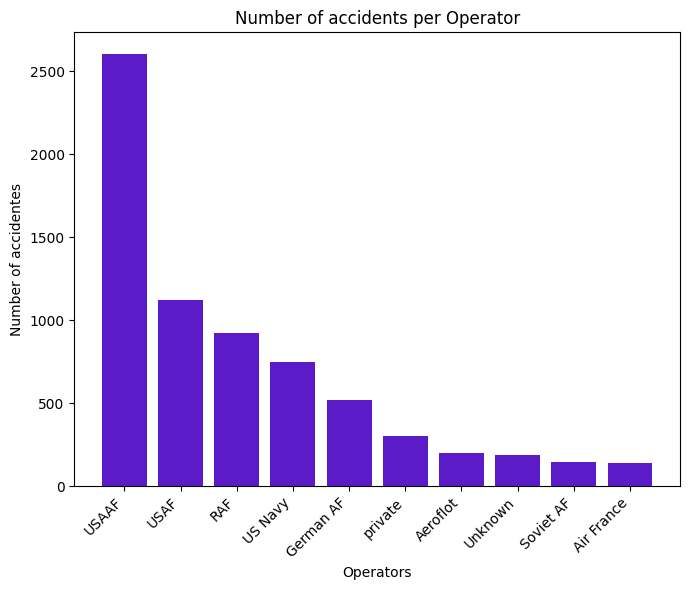

In [ ]:
# Creating a bar chart:

etiquetas = top10_companhias_acidentes['operator']
tamanho = top10_companhias_acidentes['Numero_acidentes'].values
plt.figure(figsize = (7,6))
plt.title('Number of accidents per Operator')
plt.xlabel('Operators')
plt.ylabel('Number of accidentes')
plt.bar(etiquetas, tamanho, color = '#5B1BC9')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

plt.savefig('acidentes_operadores_bar.png')



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

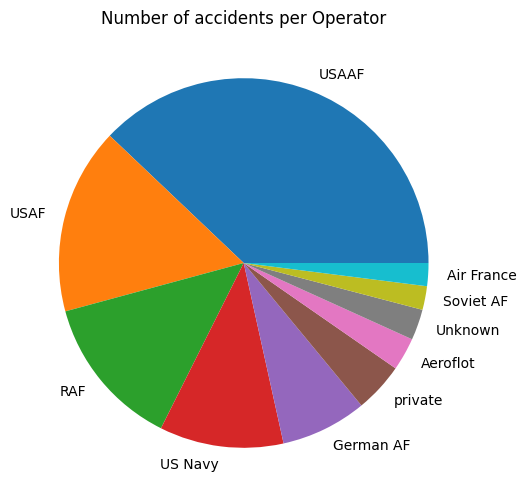

In [ ]:
#Creating a pie chart:
# x = top10_companhias_acidentes['operator']
# y = top10_companhias_acidentes['Numero_acidentes']
etiquetas = top10_companhias_acidentes['operator']
tamanho = top10_companhias_acidentes['Numero_acidentes'].values
plt.figure(figsize = (7,6))
plt.title('Number of accidents per Operator')

plt.pie(tamanho, labels = etiquetas)
plt.savefig('acidentes_operadores.png')



plt.show


# 12 - Number of accidents per type of aircraft:

In [ ]:
acidentes_tipo_aviao = base_acidentes_aviao.copy()
acidentes_tipo_aviao.head()


,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
acidentes_tipo_aviao.describe()

,date,type,registration,operator,fatalities,location,country,cat,year
count,23917,23917,22365,23913,19935,22959,23917,23917,23917
unique,15056,3193,21909,5996,369,14584,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1915,13,2603,10627,273,4371,17396,1505


In [ ]:
acidentes_tipo_aviao_1 = acidentes_tipo_aviao.groupby('type').size().reset_index(name = 'Numero_acidentes')
acidentes_tipo_aviao_1

,type,Numero_acidentes
0,A.W. AW-650 Argosy 101,3
1,A.W. AW-650 Argosy 102,1
2,A.W. AW-650 Argosy 222,4
3,A.W. AW-660 Argosy C.1,5
4,A.W. AW.15 Atalanta,3
...,...,...
3188,Yakovlev Yak-42D,6
3189,de Havilland DH-106 Comet 4,6
3190,lyushin Il-76TD,1
3191,unknown,34


In [ ]:
acidentes_tipo_aviao_final = acidentes_tipo_aviao_1.nlargest(10,'Numero_acidentes')[['type','Numero_acidentes']]
acidentes_tipo_aviao_final

,type,Numero_acidentes
1703,Douglas C-47A (DC-3),1915
1699,Douglas C-47 (DC-3),669
1704,Douglas C-47B (DC-3),592
1478,Curtiss C-46A,564
2426,Junkers Ju-52/3m,472
178,Antonov An-2R,391
1479,Curtiss C-46D,344
1937,Douglas Dakota III (DC-3),262
1593,DHC-6 Twin Otter 300,257
1294,Cessna 208B Grand Caravan,245


Gráfico de barras

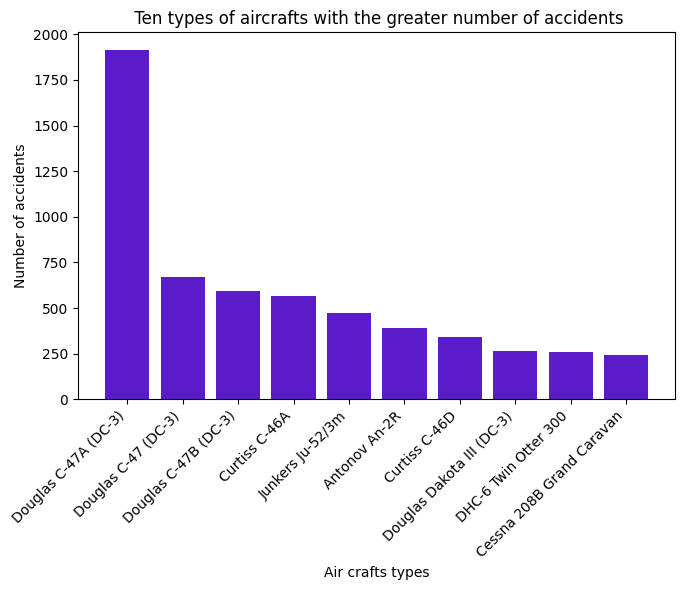

In [ ]:
x = acidentes_tipo_aviao_final['type']
y = acidentes_tipo_aviao_final['Numero_acidentes']

plt.figure(figsize=(7,6))
plt.bar(x,y,color = '#5B1BC9')
plt.xlabel('Air crafts types')
plt.ylabel('Number of accidents')
plt.title(' Ten types of aircrafts with the greater number of accidents')
plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()
plt.savefig('aircraft_types.png')
plt.show()



In [ ]:
base_acidentes_aviao.loc[base_acidentes_aviao['type']=='Douglas C-47A (DC-3)']

,date,type,registration,operator,fatalities,location,country,cat,year
40,date unk.,Douglas C-47A (DC-3),HK-1505,Unknown,0,within Bahamas,Bahamas,A1,unknown
1583,01-APR-1943,Douglas C-47A (DC-3),42-23365,USAAF,NaN,"near Victorville AAF,...",USA,A1,1943
1603,16-APR-1943,Douglas C-47A (DC-3),42-23367,USAAF,NaN,Sedalia Army Air...,USA,A1,1943
1637,08-MAY-1943,Douglas C-47A (DC-3),42-92024,USAAF,NaN,near Oklahoma City-Ti...,USA,A1,1943
1659,20-MAY-1943,Douglas C-47A (DC-3),42-23409,USAAF,NaN,near Paramaribo-Zande...,Suriname,A1,1943
...,...,...,...,...,...,...,...,...,...
19362,09-JUL-2001,Douglas C-47A (DC-3),N3239T,Valiant Air Command,0,Titusville-Space...,USA,A2,2001
19903,21-NOV-2003,Douglas C-47A (DC-3),ZS-BXF,SAA Historic Flight,0,near Lanseria Airport...,South Africa,A2,2003
20136,17-DEC-2004,Douglas C-47A (DC-3),HK-2663,Aerolineas Llaneras - Arall,0,Puerto GaitÃ¡n,Colombia,A2,2004
22523,07-APR-2016,Douglas C-47A (DC-3),HK-2663,Aerolineas Llaneras - Arall,0,near Puerto GaitÃ¡n A...,Colombia,A1,2016


#13 - Number of accidents per countries:

In [ ]:
base_acidentes_aviao.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
#Removing NaN Values:
acidentes_aviao_country = pd.DataFrame(base_acidentes_aviao['country'].dropna())
acidentes_aviao_country.head()

,country
0,Unknown country
1,Unknown country
2,Unknown country
3,Russia
4,Eritrea


In [ ]:
#Counting unknow values:
acidentes_aviao_country.loc[acidentes_aviao_country['country']=='Unknown country'].count()


country    844
dtype: int64

In [ ]:
#Removing unknown values:
acidentes_aviao_country = acidentes_aviao_country[acidentes_aviao_country['country']!='Unknown country'] 

In [ ]:
acidentes_aviao_country = acidentes_aviao_country[acidentes_aviao_country['country']!='?']


In [ ]:
acidentes_aviao_country = pd.DataFrame(acidentes_aviao_country)
acidentes_aviao_country

,country
3,Russia
4,Eritrea
5,Russia
6,Russia
7,Russia
...,...
23912,Argentina
23913,USA
23914,USA
23915,Canada


In [ ]:
accidents_country = acidentes_aviao_country.groupby('country').size().reset_index(name='Numero_acidentes')
accidents_country

,country,Numero_acidentes
0,Afghanistan,124
1,Albania,6
2,Algeria,95
3,American Samoa,6
4,Angola,129
...,...,...
225,Vietnam,320
226,Western Sahara,6
227,Yemen,66
228,Zambia,20


In [ ]:
accidents_country.describe()

,Numero_acidentes
count,230.000000
mean,100.234783
std,324.726915
min,1.000000
25%,8.000000
50%,23.000000
75%,82.500000
max,4371.000000


In [ ]:
accidents_country_1 = accidents_country.nlargest(10,'Numero_acidentes')[['country','Numero_acidentes']]
accidents_country_1

,index,country,Numero_acidentes
0,218,USA,4371
1,170,Russia,1422
2,215,U.K.,837
3,37,Canada,822
4,95,India,698
5,30,Brazil,609
6,73,France,550
7,79,Germany,515
8,43,China,508
9,46,Colombia,457


In [ ]:
accidents_country_1.shape

(10, 2)

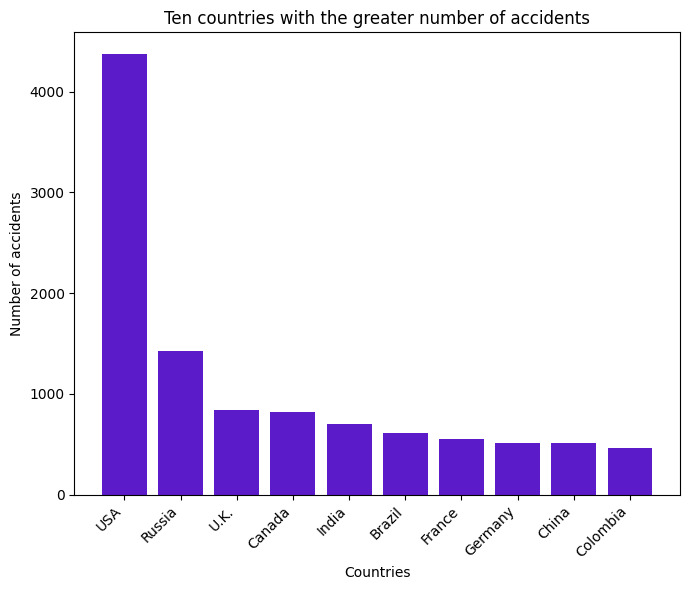

In [ ]:
#Creating a bar chart:
x = accidents_country_1['country']
y = accidents_country_1['Numero_acidentes']
plt.figure(figsize=(7,6))
plt.bar(x,y, color = '#5B1BC9')
plt.xlabel('Countries')
plt.ylabel('Number of accidents')
plt.title('Ten countries with the greater number of accidents')
plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()
plt.savefig('countries_accidents.png')
plt.show()

